In [32]:
!pip install chart-studio


In [33]:
import numpy as np
import pandas as pd
# Plotly Packages
from plotly import tools
import chart_studio.plotly as plt
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats
# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
bmi=[df["bmi"].values.tolist()]
group_labels =['Body Mass Index Distribution']

colors=['#FA5858']

fig=ff.create_distplot(bmi, group_labels, colors=colors)
#Add title
fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')
iplot(fig, filename='Basic Distplot')

<Axes: xlabel='charges', ylabel='bmi'>

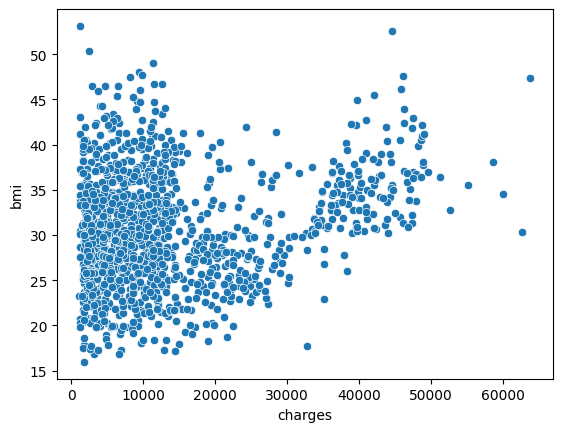

In [36]:
sns.scatterplot(x='charges', y='bmi', data=df)

<Axes: >

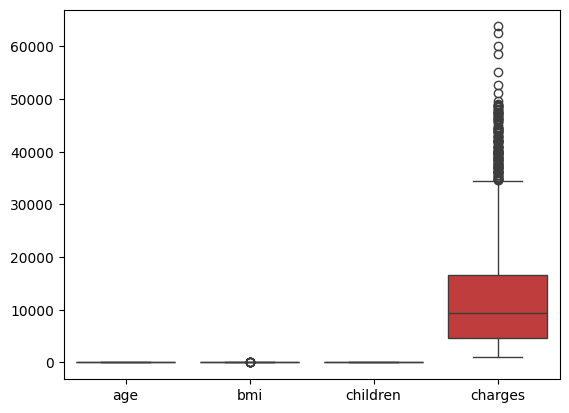

In [37]:
sns.boxplot(df)

In [38]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
  df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some sample data for demonstration purposes
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Now you can proceed with KMeans clustering
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(X)


KMeans(n_clusters=3)

In [42]:
y_kmeans=kmeans.fit_predict(X)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,female,27.900,0,yes,southwest,16884.92400,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0
2,28,male,33.000,3,no,southeast,4449.46200,2.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0


In [43]:
from sklearn.cluster import AgglomerativeClustering
X = df[["bmi", "charges"]]
agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(n_clusters=4)

In [44]:
import pandas as pd
from statsmodels.formula.api import ols

# Load your data into a DataFrame named 'train'
train = pd.read_csv('insurance.csv')  # Replace 'your_data.csv' with the actual path to your data file

# Define and fit the model
model_with_smoking = ols("charges ~ smoker + bmi + age", data=train).fit()

# Print the summary of the model
print(model_with_smoking.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:50:49   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.168e+04    937.569    -12.454

In [48]:
import pickle

# Assuming you've already loaded your model using pickle.load() and assigned it to a variable named 'kmeans'
# Example:
# with open('C:/Users/UdayA/Documents/Projects_SB/Medical Cost prediction/model.pkl', 'rb') as file:
#     kmeans = pickle.load(file)

# Assuming 'kmeans' is your KMeans object

# Now you can serialize and save the KMeans object
with open('model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)
